In [1]:
! pip install numpy

In [2]:
! pip install pandas

In [3]:
! pip install matplotlib

In [4]:
! pip install scikit-learn

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Sande\\anaconda3\\Lib\\site-packages\\numpy\\~libs\\libopenblas64__v0.3.23-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [5]:
! pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [7]:
data = pd.read_csv("C:/Users/Sande/OneDrive/Desktop/ADP-Data.csv", date_parser=True)
data = data[['Date', 'Close']]

In [8]:
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [9]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [10]:
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

In [11]:
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [12]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [13]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


In [14]:
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

In [15]:
n_steps = 60  # Number of time steps to consider for prediction
X_train, y_train = prepare_data(train_data['Close'], n_steps)
X_test, y_test = prepare_data(test_data['Close'], n_steps)


In [16]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
267/267 [==============================] - 18s 52ms/step - loss: 9.0811e-04
Epoch 2/10
267/267 [==============================] - 13s 47ms/step - loss: 1.2883e-05
Epoch 3/10
267/267 [==============================] - 12s 45ms/step - loss: 1.1802e-05
Epoch 4/10
267/267 [==============================] - 13s 47ms/step - loss: 1.1853e-05
Epoch 5/10
267/267 [==============================] - 13s 49ms/step - loss: 1.0843e-05
Epoch 6/10
267/267 [==============================] - 13s 50ms/step - loss: 1.1109e-05
Epoch 7/10
267/267 [==============================] - 13s 50ms/step - loss: 1.0142e-05
Epoch 8/10
267/267 [==============================] - 13s 47ms/step - loss: 1.0268e-05
Epoch 9/10
267/267 [==============================] - 13s 49ms/step - loss: 9.6732e-06
Epoch 10/10
267/267 [==============================] - 13s 48ms/step - loss: 9.4656e-06


In [17]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

66/66 [==============================] - 2s 17ms/step


In [18]:
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna()

In [19]:
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [20]:
X_test, y_test = prepare_data(test_data['Close'], n_steps)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


66/66 [==============================] - 1s 21ms/step


In [21]:
y_test = y_test.reshape(-1, 1)

In [22]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.19942395178191002


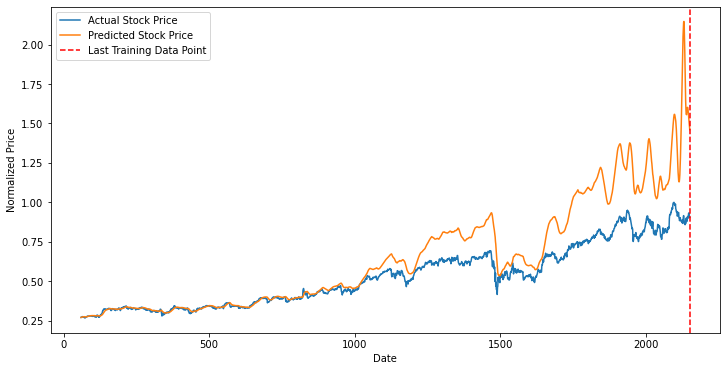

In [23]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[n_steps:], test_data['Close'][n_steps:], label='Actual Stock Price')
plt.plot(test_data.index[n_steps:], predictions, label='Predicted Stock Price')
plt.axvline(x=test_data.index[-1], color='r', linestyle='--', label='Last Training Data Point')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()